In [1]:

from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [2]:
path = "datasets/bitly_usagov/example.txt"

In [3]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]
records

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

In [4]:
time_zones = [rec["tz"] for rec in records]

KeyError: 'tz'

In [4]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [5]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [6]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [9]:
counts = get_counts(time_zones)
counts["America/New_York"]
len(time_zones)

3440

In [10]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [11]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [12]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [5]:
frame = pd.DataFrame(records)

In [6]:
frame.info()
frame["tz"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [7]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [8]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [19]:
plt.figure(figsize=(10, 2))

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

<Axes: xlabel='count', ylabel='tz'>

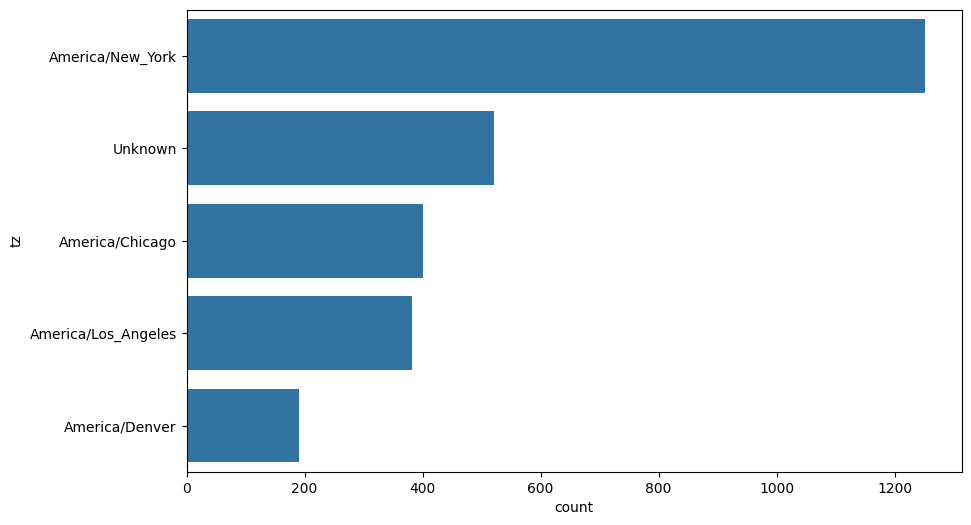

In [9]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset)

In [10]:
frame["a"][1]
frame["a"][50]
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [19]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)
results.value_counts().head(8)

In [20]:
cframe = frame[frame["a"].notna()].copy()

In [21]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

In [22]:
by_tz_os = cframe.groupby(["tz", "os"])

In [23]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

In [24]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

In [25]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

In [26]:
agg_counts.sum(axis="columns").nlargest(10)

In [27]:
plt.figure()

In [28]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)
sns.barplot(x="total", y="tz", hue="os",  data=count_subset)

In [29]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

In [30]:
plt.figure()

In [31]:
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)

In [32]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")

## Exercise

1. **Explore User Agents**:
   - Write a function to extract the browser information (the first token in the user agent string) from the "a" column in the DataFrame.
   - Count the occurrences of each unique browser in the dataset.
   - Visualize the distribution of browsers using a bar plot.

2. **Time Zone Analysis**:
   - Calculate the average time spent (in seconds) on each URL by users in different time zones.
   - Identify the time zone with the highest average time spent on URLs and the time zone with the lowest average time spent.
   - Visualize the distribution of time spent on URLs by time zone using a box plot.

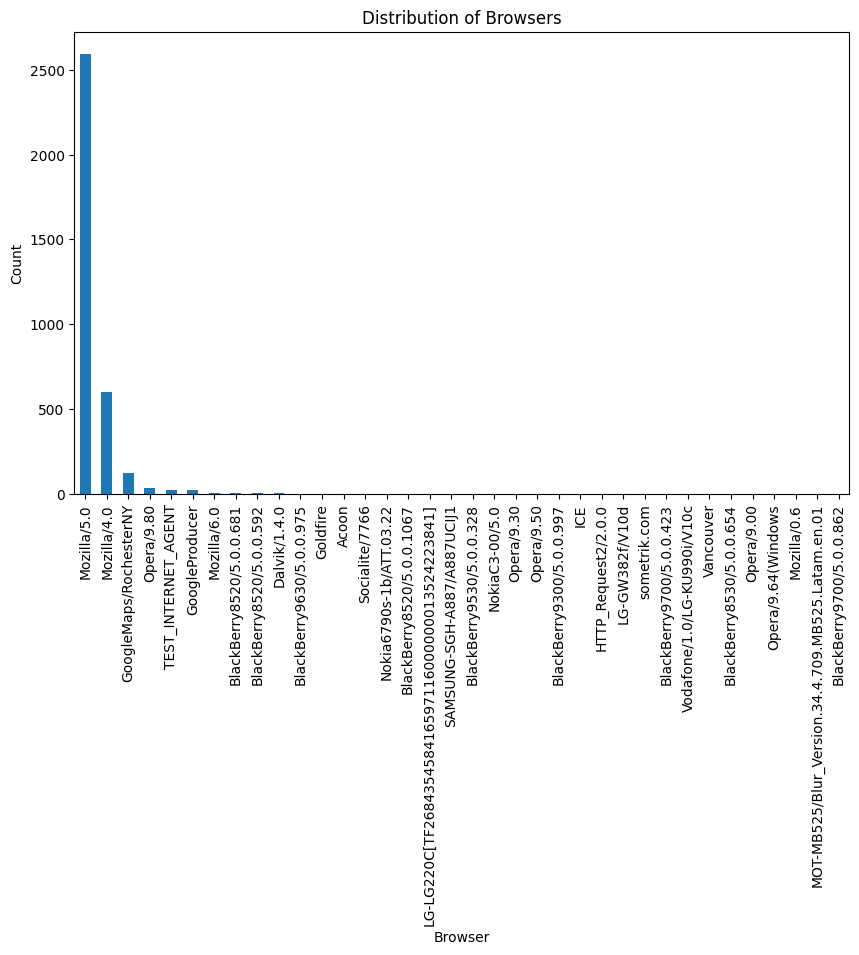

In [19]:
def extract_browser(user_agent):
    if isinstance(user_agent, str):
        return user_agent.split()[0]
    else:
        return None

browser_counts = frame["a"].apply(extract_browser).value_counts()

import matplotlib.pyplot as plt

browser_counts.plot(kind="bar")
plt.title("Distribution of Browsers")
plt.xlabel("Browser")
plt.ylabel("Count")
plt.show()

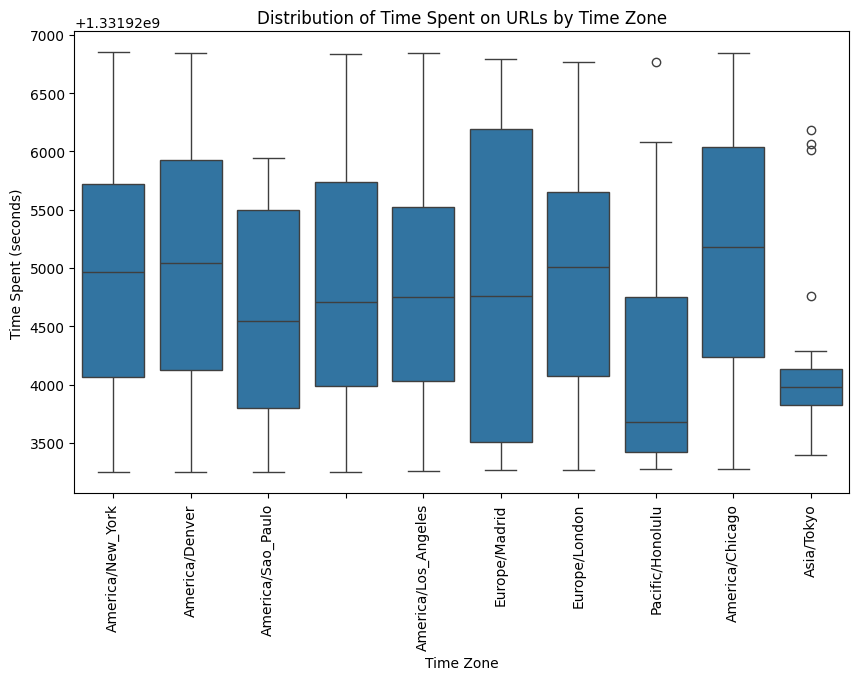

In [23]:
average_time_spent = frame.groupby("tz")["t"].mean() 


average_time_spent.idxmax()
average_time_spent.idxmin()

import seaborn as sns
top_10_time_zones = frame["tz"].value_counts().head(10).index
df_top_10 = frame[frame["tz"].isin(top_10_time_zones)]
sns.boxplot(x="tz", y="t", data=df_top_10)
plt.title("Distribution of Time Spent on URLs by Time Zone")
plt.xlabel("Time Zone")
plt.ylabel("Time Spent (seconds)")
plt.xticks(rotation=90)
plt.show()


In [33]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [34]:
users.head(5)
ratings.head(5)
movies.head(5)
ratings

In [35]:
data = pd.merge(pd.merge(ratings, users), movies)
data
data.iloc[0]

In [36]:
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

In [37]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

In [38]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

In [39]:
mean_ratings = mean_ratings.rename(index={"Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)":
                           "Seven Samurai (Shichinin no samurai) (1954)"})

In [40]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

In [41]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [42]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

In [43]:
sorted_by_diff[::-1].head()

In [44]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

In [45]:
rating_std_by_title.sort_values(ascending=False)[:10]

In [46]:
movies["genres"].head()
movies["genres"].head().str.split("|")
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

In [47]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

In [48]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))
genre_ratings[:10]

# Pull Question 1:

Suppose you want to analyze the demographic trends in movie ratings over time. Which the provided code to include the movie release year in the DataFrame. Calculate the average rating for each age group for movies released in each year. Finally, visualize the average ratings over time for different age groups to identify any trends or patterns in movie preferences across different demographics.

- a. avg_rating_by_age_year = data.groupby(["age", "year"])["age"].mean().unstack()
    - avg_rating_by_age_year.plot(marker='o', alpha=0.7)
- b. avg_rating_by_age_year = data.groupby(["age", "year"])["rating"].mean().unstack()
    -  avg_rating_by_age_year.plot(marker='o', alpha=0.7)
- c. avg_rating_by_age_year = data.groupby(["year","age"])["year"].mean().unstack()
    - avg_rating_by_age_year.plot(marker='o', alpha=0.7)

In [ ]:
# Visualize the average ratings over time for different age groups
avg_rating_by_age_year.plot(marker='o', alpha=0.7)
plt.title('Average Ratings Over Time for Different Age Groups')
plt.xlabel('Year of Movie Release')
plt.ylabel('Average Rating')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

# Pull Question 2:
Extend the analysis to explore the relationship between occupation and movie genres. Create a new DataFrame that combines user occupation information with movie genre information. Then, calculate the average rating for each genre among users from different occupations. Visualize the average ratings for each genre across different occupations to identify any occupation-specific preferences for movie genres. 

- a. 
    occupation_genre_data = pd.merge(data, users[['user_id', 'occupation']], on='occupation')

    avg_rating_by_occupation_genre = occupation_genre_data.groupby(['occupation', 'genres'])['rating'].mean().unstack()

    sns.heatmap(avg_rating_by_occupation_genre, cmap='coolwarm', annot=True, fmt=".2f")

- b. 
    occupation_genre_data = pd.merge(data, users[['user_id', 'occupation']], on='user_id')

    avg_rating_by_occupation_genre = occupation_genre_data.groupby(['occupation', 'genres'])['occupation'].mean().unstack()

    sns.heatmap(avg_rating_by_occupation_genre, cmap='coolwarm', annot=True, fmt=".2f")

- c. 
    occupation_genre_data = pd.merge(data, users[['user_id', 'occupation']], on='user_id')
    
    avg_rating_by_occupation_genre = occupation_genre_data.groupby(['occupation', 'genres'])['rating'].mean().unstack()

    sns.heatmap(avg_rating_by_occupation_genre, cmap='coolwarm', annot=True, fmt=".2f")


In [ ]:
# Visualize the average ratings for each genre across different occupations
plt.figure(figsize=(12, 8))
sns.heatmap(avg_rating_by_occupation_genre, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Average Ratings for Each Genre Across Different Occupations')
plt.xlabel('Genre')
plt.ylabel('Occupation')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [49]:
!head -n 10 datasets/babynames/yob1880.txt

In [50]:
names1880 = pd.read_csv("datasets/babynames/yob1880.txt",
                        names=["name", "sex", "births"])
names1880

In [51]:
names1880.groupby("sex")["births"].sum()

In [52]:
pieces = []
for year in range(1880, 2011):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [53]:
names

In [54]:
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc=sum)
total_births.tail()
total_births.plot(title="Total births by sex and year")

In [55]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)

In [56]:
names

In [57]:
names.groupby(["year", "sex"])["prop"].sum()

In [58]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

In [59]:
top1000 = top1000.reset_index(drop=True)

In [60]:
top1000.head()

In [61]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

In [62]:
total_births = top1000.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)

In [63]:
total_births.info()
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10),
            title="Number of births per year")

In [64]:
plt.figure()

In [65]:
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)
table.plot(title="Sum of table1000.prop by year and sex",
           yticks=np.linspace(0, 1.2, 13))

In [66]:
df = boys[boys["year"] == 2010]
df

In [67]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)

In [68]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

In [69]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

In [70]:
fig = plt.figure()

In [71]:
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

In [72]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)

In [73]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

In [74]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

In [75]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)

In [76]:
plt.subplots_adjust(hspace=0.25)

In [77]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

In [78]:
plt.close("all")

In [79]:
fig = plt.figure()

In [80]:
dny_ts.plot()

In [81]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

In [82]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

In [83]:
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

In [84]:
fig = plt.figure()

In [85]:
table.plot(style={"M": "k-", "F": "k--"})

In [86]:
import json
db = json.load(open("datasets/usda_food/database.json"))
len(db)

In [87]:
db[0].keys()
db[0]["nutrients"][0]
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(7)

In [88]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()
info.info()

In [89]:
pd.value_counts(info["group"])[:10]

In [90]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [91]:
nutrients

In [92]:
nutrients.duplicated().sum()  # number of duplicates
nutrients = nutrients.drop_duplicates()

In [93]:
col_mapping = {"description" : "food",
               "group"       : "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
info.info()
col_mapping = {"description" : "nutrient",
               "group" : "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

In [94]:
ndata = pd.merge(nutrients, info, on="id")
ndata.info()
ndata.iloc[30000]

In [95]:
fig = plt.figure()

In [96]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh")

In [97]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
    return x.loc[x.value.idxmax()]

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

In [98]:
max_foods.loc["Amino Acids"]["food"]

In [99]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

In [100]:
fec.iloc[123456]

In [101]:
unique_cands = fec["cand_nm"].unique()
unique_cands
unique_cands[2]

In [102]:
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

In [103]:
fec["cand_nm"][123456:123461]
fec["cand_nm"][123456:123461].map(parties)
# Add it as a column
fec["party"] = fec["cand_nm"].map(parties)
fec["party"].value_counts()

In [104]:
(fec["contb_receipt_amt"] > 0).value_counts()

In [105]:
fec = fec[fec["contb_receipt_amt"] > 0]

In [106]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

In [107]:
fec["contbr_occupation"].value_counts()[:10]

In [108]:
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

In [109]:
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

In [110]:
by_occupation = fec.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

In [111]:
plt.figure()

In [112]:
over_2mm.plot(kind="barh")

In [113]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

In [114]:
grouped = fec_mrbo.groupby("cand_nm")
grouped.apply(get_top_amounts, "contbr_occupation", n=7)
grouped.apply(get_top_amounts, "contbr_employer", n=10)

In [115]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

In [116]:
grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

In [117]:
plt.figure()

In [118]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"),
                              axis="index")
normed_sums
normed_sums[:-2].plot(kind="barh")

In [119]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals = totals[totals.sum(axis="columns") > 100000]
totals.head(10)

In [120]:
percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)